# MIF04 Apprentissage et Analyse de données

Année 2022-2023

## Atelier 2 : Apprentissage supervisé avec Python

------------------------

NGUYEN Cecilia p1908025

ENG Charles p1403762

TANG Kévin p1501263

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Partie 1 : Feature engineering et Classification

### Question 1

In [ ]:
#Lecture du fichier
data = pd.read_csv('./credit_scoring.csv', sep=';')
labels = data.columns

#Transformation en array
data_array = data.to_numpy()

#Séparation des données
data_splited = np.hsplit(data_array, np.array([13]))
data_carateres = data_splited[0]
data_colStatus = data_splited[1]
print("data_carateres shape : ", np.shape(data_carateres))
print("data_colStatus shape : ", np.shape(data_colStatus))
print("moyenne positive : ", np.mean(data_colStatus))

data_carateres shape :  (4375, 13)
data_colStatus shape :  (4375, 1)
moyenne positive :  0.7220571428571428


In [ ]:
data

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1.0,1.0,60.0,39.0,0.0,1.0,0.0,69.0,92.0,0.0,0.0,900.0,1020.0,0
4371,22.0,0.0,60.0,46.0,0.0,1.0,0.0,60.0,75.0,3000.0,600.0,950.0,1263.0,1
4372,0.0,0.0,24.0,37.0,0.0,1.0,1.0,60.0,90.0,3500.0,0.0,500.0,963.0,0
4373,0.0,1.0,48.0,23.0,1.0,1.0,1.0,49.0,140.0,0.0,0.0,550.0,550.0,1


In [ ]:
#Séparation des données selon la valeur de Status
colStatus = data_array[:,13]
array1 = data_array[colStatus==1]
array0 = data_array[colStatus==0] 

In [ ]:
#Pourcentage de lignes ayant Status==0
prct0 = (array0.shape[0] / data.shape[0]) * 100
print("Pourcentage d'exemples positifs :", prct0)

Pourcentage d'exemples positifs : 27.794285714285717


In [ ]:
#Pourcentage de lignes ayant Status==1
prct1 = (array1.shape[0] / data.shape[0]) * 100
print("Pourcentage d'exemples négatifs :", prct1)

Pourcentage d'exemples négatifs : 72.20571428571428


In [ ]:
#Séparation des données en deux parties :
#une partie d'apprentissage et l'autre de test
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree

x_train, x_test, y_train, y_test  = train_test_split(data_carateres, data_colStatus, random_state=1, test_size=0.5)

In [ ]:
x_test = x_test[:2187]
y_test = y_test[:2187]

### Question 2

In [ ]:
#Imports pour calculer les scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
#Arbre CART
classif_cart = DecisionTreeClassifier(random_state = 1)
decision = classif_cart.fit(x_train,y_train)
y_pred_cart = decision.predict(x_test)

In [ ]:
#decision.score(x_train,y_test) pareil
print("Accuracy : ", accuracy_score(y_test, y_pred_cart))
print("Precision score : ", precision_score(y_test, y_pred_cart))
print("Recall score : ", recall_score(y_test, y_pred_cart))

Accuracy :  0.7274805669867398
Precision score :  0.8194174757281554
Recall score :  0.7997473152242578


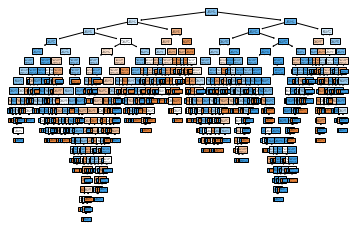

In [ ]:
plot_tree(decision, filled=True)
plt.show()

In [ ]:
#K-plus-proches-voisins
from sklearn import neighbors
classif_knn = neighbors.KNeighborsClassifier(5)
classif_knn.fit(x_train, y_train)
y_pred_knn = classif_knn.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))
print("Precision score : ", precision_score(y_test, y_pred_knn))
print("Recall score : ", recall_score(y_test, y_pred_knn))

Accuracy :  0.7247370827617741
Precision score :  0.7708448371065709
Recall score :  0.8818698673404928


In [ ]:
#MultilayerPerceptron
from sklearn.neural_network import MLPClassifier
classif_mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40,20))
classif_mlp.fit(x_train, y_train)
y_pred_mlp = classif_mlp.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_mlp))
print("Precision score : ", precision_score(y_test, y_pred_mlp))
print("Recall score : ", recall_score(y_test, y_pred_mlp))

Accuracy :  0.6977594878829446
Precision score :  0.7955128205128205
Recall score :  0.7839545167403664


### Question 3

In [ ]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
#Arbre CART
classif_cart = DecisionTreeClassifier(random_state = 1)
classif_cart.fit(x_train_scaled , y_train)
y_pred_cart_norm = classif_cart.predict(x_test_scaled)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_cart_norm))
print("Precision score : ", precision_score(y_test, y_pred_cart_norm))
print("Recall score : ", recall_score(y_test, y_pred_cart_norm))

Accuracy :  0.7192501143118427
Precision score :  0.8185404339250493
Recall score :  0.786481364497789


In [ ]:
#K-plus-proches-voisins
classif_knn = neighbors.KNeighborsClassifier(5)
classif_knn.fit(x_train_scaled, y_train)
y_pred_knn_norm = classif_knn.predict(x_test_scaled)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn_norm))
print("Precision score : ", precision_score(y_test, y_pred_knn_norm))
print("Recall score : ", recall_score(y_test, y_pred_knn_norm))

Accuracy :  0.7489711934156379
Precision score :  0.8084725536992841
Recall score :  0.8559696778269109


In [ ]:
#MultilayerPerceptron
classif_mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40,20))
classif_mlp.fit(x_train_scaled, y_train)
y_pred_mlp_norm = classif_mlp.predict(x_test_scaled)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_mlp_norm))
print("Precision score : ", precision_score(y_test, y_pred_mlp_norm))
print("Recall score : ", recall_score(y_test, y_pred_mlp_norm))

Accuracy :  0.7754915409236397
Precision score :  0.8378712871287128
Recall score :  0.8553379658875553


**Interprétation :**

Pour la méthode de l'arbre CART, la normalisation des données diminue légèrement le scores des 3 critères.

Pour la méthode de K-plus-proche-voisins, la normalisation des données augmente le scores des 3 critères.

Pour la méthode de MultilayerPerceptron, la normalisation des données augmente le score des 3 critères.

L'augmentation du critère d'accuracy signifie que les prédictions deviennent plus précises.

L'augmentation des critères "Precision score" et "Recall score" signifient que les prédictions sont plus pertinentes. 

Sachant que pour calculer le "Precision score", il faut diviser les vrais positifs par la somme des vrais positifs et des faux positifs, donc plus il est élevé, moins il y a de faux positifs.

Pour calculer le "Recall score", il faut diviser les vrais positifs par la somme des vrais positifs et des faux négatifs, donc plus il est élevé, moins il y a de faux négatifs.



### Question 4

In [ ]:
#Application de l'ACP
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.fit_transform(x_test_scaled)

#Récupération des 3 premieres dimensions
x_train_three = np.hsplit(x_train_pca, np.array([3]))
x_test_three = np.hsplit(x_test_pca, np.array([3]))

#Fusion avec les données normalisées
x_train_fusion = np.hstack((x_train_scaled, x_train_three[0]))
x_test_fusion = np.hstack((x_test_scaled, x_test_three[0]))

In [ ]:
#Arbre CART
classif_cart = DecisionTreeClassifier(random_state = 1)
classif_cart.fit(x_train_fusion , y_train)
y_pred_cart_pca = classif_cart.predict(x_test_fusion)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_cart_pca))
print("Precision score : ", precision_score(y_test, y_pred_cart_pca))
print("Recall score : ", recall_score(y_test, y_pred_cart_pca))

Accuracy :  0.7251943301326017
Precision score :  0.829088471849866
Recall score :  0.7814276689829438


In [ ]:
#K-plus-proches-voisins
classif_knn = neighbors.KNeighborsClassifier(5)
classif_knn.fit(x_train_fusion, y_train)
y_pred_knn_pca = classif_knn.predict(x_test_fusion)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn_pca))
print("Precision score : ", precision_score(y_test, y_pred_knn_pca))
print("Recall score : ", recall_score(y_test, y_pred_knn_pca))

Accuracy :  0.7594878829446731
Precision score :  0.8099706744868035
Recall score :  0.8723941882501579


In [ ]:
#MultilayerPerceptron
classif_mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40,20))
classif_mlp.fit(x_train_fusion, y_train)
y_pred_mlp_pca = classif_mlp.predict(x_test_fusion)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_mlp_pca))
print("Precision score : ", precision_score(y_test, y_pred_mlp_pca))
print("Recall score : ", recall_score(y_test, y_pred_mlp_pca))

Accuracy :  0.7754915409236397
Precision score :  0.8277310924369747
Recall score :  0.8711307643714467


**Que se passe-t-il ?**

Pour la méthode de l'arbre CART, l'application de l'ACP augmente les scores de l'Accuracy et de la Precision mais fait baisser légèrement le Recall score.

Pour la méthode de K-plus-proche-voisins, l'application de l'ACP augmente le score des 3 critères.

Pour la méthode de MultilayerPerceptron, l'application de l'ACP ne change pas le score d'Accuracy, fait diminuer le score de Precision et augmente le Recall Score.


L'application de l'ACP a augmenté le taux de vrais positifs.

In [ ]:
#Meilleure accuracy : MLP avec normalisation/avec pca (0.7754915409236397)
#Meilleure Precision : Algo MLP avec normalisation et sans pca (0.8378712871287128)
#Meilleur Recall : Algo knn sans normalisation et sans pca (0.8818698673404928)

In [ ]:
#Plus Precision élevé moins il y a de faux positif
#utilisé pour prédire les vrais positifs

#Plus recall élevé plus il y a de positif
#utilisé pour éliminer les faux négatifs

**Conclusion :**

Dans notre cas, nous voulons éliminer le plus de faux positifs possible pour récupérer le plus de vrais positifs et être certain du Status positif pour le plus grand nombre de personnes possibles.

Donc, le meilleur algorithme que nous avons choisi est l'algorithme du Multilayer Perceptron normalisé car il obtient le meilleur score de precision.

### Question 5

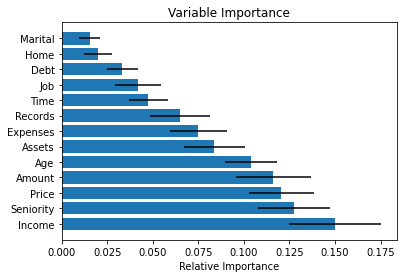

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classif_rfc = RandomForestClassifier(n_estimators=100)
classif_rfc.fit(x_train_scaled, y_train)

importances = classif_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in classif_rfc.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
padding = np.arange(x_train_scaled.size/len(x_train_scaled)) + 0.5

plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, labels[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Nous voyons grâce à ce graphique quelles variables ont le plus d'importances dans la décision du Status.

In [ ]:
for f in range(x_train_scaled.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, sorted_idx[f], importances[sorted_idx[f]]))

1. Feature 8 (0.149976)
2. Feature 0 (0.127647)
3. Feature 12 (0.120596)
4. Feature 11 (0.116178)
5. Feature 3 (0.103856)
6. Feature 9 (0.083783)
7. Feature 7 (0.074967)
8. Feature 5 (0.064847)
9. Feature 2 (0.047465)
10. Feature 6 (0.041811)
11. Feature 10 (0.033335)
12. Feature 1 (0.020029)
13. Feature 4 (0.015509)


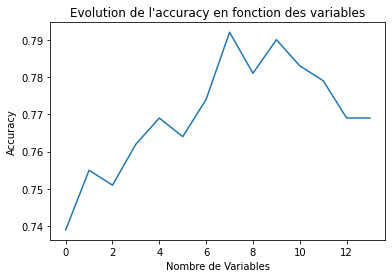

In [ ]:
classif_mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40,20))
scores=np.zeros(x_train_scaled.shape[1]+1)

for f in np.arange(0, x_train_scaled.shape[1]+1):
 X1_f = x_train_scaled[:,sorted_idx[:f+1]]
 X2_f = x_test_scaled [:,sorted_idx[:f+1]]
 classif_mlp.fit(X1_f,y_train)
 Yclassif_mlp = classif_mlp.predict(X2_f)
 scores[f] = np.round(accuracy_score(y_test, Yclassif_mlp), 3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

Ce graphique nous montre l'évolution de l'accuracy en fonction du nombre de variables. Nous allons donc prendre en compte le nombre de variables indiqué pour avoir une accuracy maximum, ici 8 variables.

### Question 6

In [ ]:
x_train = x_train[:, [8,0,12,11,3,9,7,5]]
x_train_scaled = x_train_scaled[:, [8,0,12,11,3,9,7,5]]
x_test = x_test[:, [8,0,12,11,3,9,7,5]]

In [ ]:
#MultilayerPerceptron
from sklearn.neural_network import MLPClassifier
classif_mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [(40,20)],
              'random_state': [1],
              'alpha': [0.001, 0.01, 0.1, 0.25, 0.50, 0.75, 1.0],
              'activation': ['identity', 'logistic', 'tanh', 'relu']
              }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(classif_mlp, param_grid)

In [ ]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0],
                         'hidden_layer_sizes': [(40, 20)],
                         'random_state': [1]})

In [ ]:
best_params = grid_search.best_params_
print("Best parameters are : ", best_params)

best_score = grid_search.best_score_
print("Best score is : ", best_score)

Best parameters are :  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (40, 20), 'random_state': 1}
Best score is :  0.7850798825533161


### Question 7

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=1, hidden_layer_sizes=(40,20), activation="logistic", alpha=0.001))
])

pipe.fit(x_train, y_train)

y_pred_pipe = pipe.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_pipe))
print("Precision score : ", precision_score(y_test, y_pred_pipe))
print("Recall score : ", recall_score(y_test, y_pred_pipe))

Accuracy :  0.7946959304983996
Precision score :  0.8251146788990825
Recall score :  0.9090334807327859


In [ ]:
import pickle

In [ ]:
# Pour sauvegarder un pipe dans un fichier pickle :
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [ ]:
#Pour recuperer un fichier pkl :
with open('pipe.pkl', 'rb') as f:
    pipe2 = pickle.load(f)

### Question 8

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
clfs = {
 'NBS': BernoulliNB(),
 'CART': DecisionTreeClassifier(criterion='gini'),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'DSP': DecisionTreeClassifier(max_depth=1),
 'MLP20': MLPClassifier(hidden_layer_sizes=(20,10)),
 'MLP40': MLPClassifier(hidden_layer_sizes=(40,20)),
 'KNN5': neighbors.KNeighborsClassifier(n_neighbors=5),
 'KNN10': neighbors.KNeighborsClassifier(n_neighbors=10),
 'BAG100': BaggingClassifier(n_estimators=100),
 'BAG200': BaggingClassifier(n_estimators=200),
 'ADA100': AdaBoostClassifier(n_estimators=100),
 'ADA200': AdaBoostClassifier(n_estimators=200),
 'RF100': RandomForestClassifier(n_estimators=100),
 'RF200': RandomForestClassifier(n_estimators=200)
}

In [ ]:
def run_classifiers(clfs, X, Y):
  kf = KFold(n_splits=10, shuffle=True, random_state=0)
  for i in clfs:
    clf = clfs[i]
    cv_acc = cross_validate(clf, X, Y, cv=kf, scoring=['accuracy','precision','roc_auc'])
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_accuracy']), np.std(cv_acc['test_accuracy'])))
    print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_precision']), np.std(cv_acc['test_precision'])))
    print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_roc_auc']), np.std(cv_acc['test_roc_auc'])))
    print("\n")

In [ ]:
run_classifiers(clfs, x_train, y_test)

Accuracy for NBS is: 0.724 +/- 0.024
Precision for NBS is: 0.724 +/- 0.024
AUC for NBS is: 0.516 +/- 0.039


Accuracy for CART is: 0.609 +/- 0.031
Precision for CART is: 0.734 +/- 0.029
AUC for CART is: 0.519 +/- 0.029


Accuracy for ID3 is: 0.594 +/- 0.039
Precision for ID3 is: 0.724 +/- 0.030
AUC for ID3 is: 0.501 +/- 0.041


Accuracy for DSP is: 0.724 +/- 0.024
Precision for DSP is: 0.724 +/- 0.024
AUC for DSP is: 0.515 +/- 0.009


Accuracy for MLP20 is: 0.630 +/- 0.108
Precision for MLP20 is: 0.716 +/- 0.042
AUC for MLP20 is: 0.505 +/- 0.032


Accuracy for MLP40 is: 0.652 +/- 0.094
Precision for MLP40 is: 0.726 +/- 0.027
AUC for MLP40 is: 0.500 +/- 0.036


Accuracy for KNN5 is: 0.681 +/- 0.028
Precision for KNN5 is: 0.734 +/- 0.025
AUC for KNN5 is: 0.527 +/- 0.038


Accuracy for KNN10 is: 0.674 +/- 0.028
Precision for KNN10 is: 0.726 +/- 0.026
AUC for KNN10 is: 0.508 +/- 0.045


Accuracy for BAG100 is: 0.693 +/- 0.025
Precision for BAG100 is: 0.722 +/- 0.027
AUC for BAG100 is: 0.49

**Interprétation :**

Comme indiqué plus tôt, le critère qui nous importe le plus est le score de precision.

Les algorithmes les plus pertinents et précis sont l'arbre CART (0.734 +/- 0.029), le k-plus-proches-voisins avec 5 voisins (0.734 +/- 0.025) et le MultilayerPerceptron40 (0.726 +/- 0.027)

In [ ]:
#Avec les données normalisées
run_classifiers(clfs, x_train_scaled, y_test)

Accuracy for NBS is: 0.724 +/- 0.024
Precision for NBS is: 0.724 +/- 0.024
AUC for NBS is: 0.515 +/- 0.056


Accuracy for CART is: 0.610 +/- 0.032
Precision for CART is: 0.736 +/- 0.037
AUC for CART is: 0.521 +/- 0.043


Accuracy for ID3 is: 0.595 +/- 0.032
Precision for ID3 is: 0.725 +/- 0.032
AUC for ID3 is: 0.502 +/- 0.033


Accuracy for DSP is: 0.724 +/- 0.024
Precision for DSP is: 0.724 +/- 0.024
AUC for DSP is: 0.515 +/- 0.009


Accuracy for MLP20 is: 0.716 +/- 0.020
Precision for MLP20 is: 0.725 +/- 0.023
AUC for MLP20 is: 0.489 +/- 0.027


Accuracy for MLP40 is: 0.709 +/- 0.029
Precision for MLP40 is: 0.728 +/- 0.028
AUC for MLP40 is: 0.497 +/- 0.052


Accuracy for KNN5 is: 0.671 +/- 0.025
Precision for KNN5 is: 0.730 +/- 0.032
AUC for KNN5 is: 0.509 +/- 0.037


Accuracy for KNN10 is: 0.676 +/- 0.022
Precision for KNN10 is: 0.725 +/- 0.027
AUC for KNN10 is: 0.492 +/- 0.024


Accuracy for BAG100 is: 0.691 +/- 0.027
Precision for BAG100 is: 0.721 +/- 0.027
AUC for BAG100 is: 0.48

**Interprétation :**

Les algorithmes les plus pertinents et précis sont l'arbre CART (0.736 +/- 0.037), le k-plus-proches-voisins avec 5 voisins (0.730 +/- 0.032) et MultilayerPerceptron40 (0.728 +/- 0.028).

Avec les données normalisées, on remarque que les algorithmes les plus pertinents sont les mêmes (et que leurs accuracies ne changent pas ou très peu). Certains algorithmes ont leur accuracy qui change légèrement, mais rien de significatif au regard de l'ecart-type.

## Partie 2 : Données hétérogènes

### Question 1

In [ ]:
#Lecture du fichier
data = pd.read_csv('./credit.data', header=None, sep='\t')

#Transformation en array
data_array = data.to_numpy()

In [ ]:
#Affichage des donnees
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
684,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
685,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
686,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [ ]:
#Séparation des données
data_splited = np.hsplit(data_array, np.array([15]))
data_carateres = data_splited[0]
data_target = data_splited[1]

In [ ]:
#Garde les colonnes dont les données sont des nombres
data_numbers = data_carateres[:,[1,2,7,10,13,14]]

In [ ]:
#Remplace les '?' par des 'nan'
data_numbers = np.where(data_numbers == '?', np.nan, data_numbers)

In [ ]:
#Changement du type du tableau en float
data_numbers = data_numbers.astype(float)

In [ ]:
#Recuperation des lignes contenant nan
NanRow = np.isnan(data_numbers).any(axis=1)

In [ ]:
#Suppression des lignes contenant nan
data_sansNan = data_numbers[~NanRow]
data_target_sansNan = data_target[~NanRow]

In [ ]:
#Taille de l'echantillon
print("Taille de l'échantillon :", data_sansNan.shape)

Taille de l'échantillon : (666, 6)


Number of + : 299
Number of - : 367


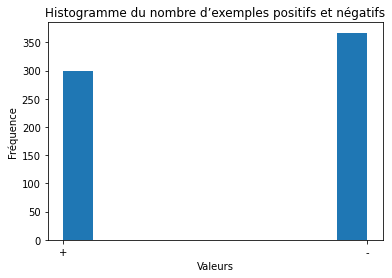

In [ ]:
# Nombre d’exemples positifs et négatifs
countTarget = np.unique(data_target_sansNan, return_counts=True)

print("Number of", countTarget[0][0], ":", countTarget[1][0])
print("Number of", countTarget[0][1], ":", countTarget[1][1])

#Affichage de l'histogramme
plt.hist(data_target_sansNan)
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.title("Histogramme du nombre d’exemples positifs et négatifs")
plt.show()

In [ ]:
#Remplacement des + par 1 et des - par 0
data_target_sansNan = np.where(data_target_sansNan == '+', 1, data_target_sansNan)
data_target_sansNan = np.where(data_target_sansNan == '-', 0, data_target_sansNan)

In [ ]:
#Rappel des classifiers et fonction run
clfs = {
 'NBS': BernoulliNB(),
 'CART': DecisionTreeClassifier(criterion='gini'),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'DSP': DecisionTreeClassifier(max_depth=1),
 'MLP20': MLPClassifier(hidden_layer_sizes=(20,10)),
 'MLP40': MLPClassifier(hidden_layer_sizes=(40,20)),
 'KNN5': neighbors.KNeighborsClassifier(n_neighbors=5),
 'KNN10': neighbors.KNeighborsClassifier(n_neighbors=10),
 'BAG100': BaggingClassifier(n_estimators=100),
 'BAG200': BaggingClassifier(n_estimators=200),
 'ADA100': AdaBoostClassifier(n_estimators=100),
 'ADA200': AdaBoostClassifier(n_estimators=200),
 'RF100': RandomForestClassifier(n_estimators=100),
 'RF200': RandomForestClassifier(n_estimators=200)
}

def run_classifiers(clfs, X, Y):
  kf = KFold(n_splits=10, shuffle=True, random_state=0)
  for i in clfs:
    clf = clfs[i]
    cv_acc = cross_validate(clf, X, Y, cv=kf, scoring=['accuracy','precision','roc_auc'])
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_accuracy']), np.std(cv_acc['test_accuracy'])))
    print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_precision']), np.std(cv_acc['test_precision'])))
    print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_roc_auc']), np.std(cv_acc['test_roc_auc'])))
    print("\n")

In [ ]:
data_sansNan = data_sansNan.astype(float)
data_target_sansNan = data_target_sansNan.astype(int)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(data_sansNan, data_target_sansNan, random_state=1, test_size=0.5)

In [ ]:
run_classifiers(clfs, x_train, y_test)

Accuracy for NBS is: 0.541 +/- 0.073
Precision for NBS is: 0.419 +/- 0.176
AUC for NBS is: 0.565 +/- 0.087


Accuracy for CART is: 0.481 +/- 0.073
Precision for CART is: 0.400 +/- 0.101
AUC for CART is: 0.472 +/- 0.076


Accuracy for ID3 is: 0.484 +/- 0.054
Precision for ID3 is: 0.398 +/- 0.099
AUC for ID3 is: 0.470 +/- 0.057


Accuracy for DSP is: 0.550 +/- 0.068
Precision for DSP is: 0.509 +/- 0.293
AUC for DSP is: 0.508 +/- 0.049


Accuracy for MLP20 is: 0.526 +/- 0.056
Precision for MLP20 is: 0.420 +/- 0.154
AUC for MLP20 is: 0.530 +/- 0.091


Accuracy for MLP40 is: 0.547 +/- 0.089
Precision for MLP40 is: 0.463 +/- 0.110
AUC for MLP40 is: 0.510 +/- 0.128


Accuracy for KNN5 is: 0.547 +/- 0.090
Precision for KNN5 is: 0.477 +/- 0.126
AUC for KNN5 is: 0.525 +/- 0.124


Accuracy for KNN10 is: 0.520 +/- 0.077
Precision for KNN10 is: 0.389 +/- 0.134
AUC for KNN10 is: 0.496 +/- 0.094


Accuracy for BAG100 is: 0.517 +/- 0.073
Precision for BAG100 is: 0.429 +/- 0.145
AUC for BAG100 is: 0.47

Interprétation :

Meilleure Accuracy : DecisionTreeClassifier (0.550 +/- 0.068), K-plus-proches-voisins avec 5 voisins (0.547 +/- 0.090) et MultilayerPerceptron40 (0.547 +/- 0.089)

Meilleure Precision : DecisionTreeClassifier (0.509 +/- 0.293), K-plus-proches-voisins avec 5 voisins (0.477 +/- 0.126) et RandomForestClassifier200 (0.474 +/- 0.166)

Meilleure AUC : BernoulliNB (0.565 +/- 0.087), MultilayerPerceptron20 (0.530 +/- 0.091) et K-plus-proches-voisins avec 5 voisins (0.525 +/- 0.124)

Ici, on remarque que les écart-type sont élevés donc les scores mesurés sont assez incertains.
De plus, obtenir des scores proches de 0.5 n'est pas bon signe car cela signifie que les prédictions faites sont elles-mêmes incertaines.

In [ ]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
run_classifiers(clfs, x_train_scaled, y_test)

Accuracy for NBS is: 0.565 +/- 0.075
Precision for NBS is: 0.530 +/- 0.204
AUC for NBS is: 0.517 +/- 0.050


Accuracy for CART is: 0.469 +/- 0.083
Precision for CART is: 0.391 +/- 0.117
AUC for CART is: 0.463 +/- 0.084


Accuracy for ID3 is: 0.496 +/- 0.053
Precision for ID3 is: 0.402 +/- 0.099
AUC for ID3 is: 0.481 +/- 0.057


Accuracy for DSP is: 0.550 +/- 0.068
Precision for DSP is: 0.509 +/- 0.293
AUC for DSP is: 0.508 +/- 0.049


Accuracy for MLP20 is: 0.522 +/- 0.075
Precision for MLP20 is: 0.382 +/- 0.181
AUC for MLP20 is: 0.506 +/- 0.076


Accuracy for MLP40 is: 0.501 +/- 0.066
Precision for MLP40 is: 0.358 +/- 0.159
AUC for MLP40 is: 0.458 +/- 0.086


Accuracy for KNN5 is: 0.510 +/- 0.086
Precision for KNN5 is: 0.436 +/- 0.112
AUC for KNN5 is: 0.505 +/- 0.110


Accuracy for KNN10 is: 0.532 +/- 0.049
Precision for KNN10 is: 0.431 +/- 0.194
AUC for KNN10 is: 0.533 +/- 0.099


Accuracy for BAG100 is: 0.526 +/- 0.080
Precision for BAG100 is: 0.444 +/- 0.112
AUC for BAG100 is: 0.46

Interprétation : 

Meilleure Accuracy : BernoulliNB (0.565 +/- 0.075), DecisionTreeClassifier (0.550 +/- 0.068) et RandomForestClassifier avec n=100 (0.544 +/- 0.104)

Meilleure Precision : BernoulliNB (0.530 +/- 0.204), DecisionTreeClassifier (0.509 +/- 0.293) et BaggingClassifier avec n=200 (0.451 +/- 0.157)

Meilleure AUC : K-plus-proches-voisins avec 10 voisins (0.533 +/- 0.099), BernoulliNB (0.517 +/- 0.050) et DecisionTreeClassifier (0.508 +/- 0.049)

Même conclusion que la question précédente.

### Question 2

In [ ]:
from sklearn.impute import SimpleImputer as Imputer

In [ ]:
#Donnees categorielles
X_cat = data_carateres[:,[0,3,4,5,6,8,9,11,12]]
for col_id in range(0,9):
 unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
 X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [ ]:
#Donnees numeriques
X_num = data_numbers
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [ ]:
#Concaténation des donnees categorielles et numeriques
X = np.concatenate((X_cat_bin, X_num),axis=1)

In [ ]:
#Remplacement des + par 1 et des - par 0
data_target = np.where(data_target == '+', 1, data_target)
data_target = np.where(data_target == '-', 0, data_target)

data_target = data_target.astype(int)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X, data_target, random_state=1, test_size=0.5)

In [ ]:
run_classifiers(clfs, x_train, y_test)

Accuracy for NBS is: 0.526 +/- 0.062
Precision for NBS is: 0.439 +/- 0.091
AUC for NBS is: 0.523 +/- 0.089


Accuracy for CART is: 0.497 +/- 0.065
Precision for CART is: 0.388 +/- 0.116
AUC for CART is: 0.480 +/- 0.054


Accuracy for ID3 is: 0.497 +/- 0.065
Precision for ID3 is: 0.386 +/- 0.133
AUC for ID3 is: 0.484 +/- 0.064


Accuracy for DSP is: 0.582 +/- 0.087
Precision for DSP is: 0.381 +/- 0.232
AUC for DSP is: 0.534 +/- 0.075


Accuracy for MLP20 is: 0.547 +/- 0.101
Precision for MLP20 is: 0.428 +/- 0.209
AUC for MLP20 is: 0.523 +/- 0.095


Accuracy for MLP40 is: 0.541 +/- 0.065
Precision for MLP40 is: 0.417 +/- 0.143
AUC for MLP40 is: 0.520 +/- 0.055


Accuracy for KNN5 is: 0.486 +/- 0.088
Precision for KNN5 is: 0.331 +/- 0.111
AUC for KNN5 is: 0.467 +/- 0.116


Accuracy for KNN10 is: 0.573 +/- 0.063
Precision for KNN10 is: 0.459 +/- 0.149
AUC for KNN10 is: 0.510 +/- 0.086


Accuracy for BAG100 is: 0.553 +/- 0.077
Precision for BAG100 is: 0.456 +/- 0.100
AUC for BAG100 is: 0.51

Meilleur Accuracy : DecisionTreeClassifier (0.582 +/- 0.087), RandomForestClassifier100 (0.574 +/- 0.134) et K-plus-proches-voisins avec 10 voisins (0.573 +/- 0.063)

Meilleur Precision : RandomForestClassifier100 (0.528 +/- 0.175), RandomForestClassifier200 (0.517 +/- 0.231) et BaggingClassifier200 (0.497 +/- 0.163)

Meilleur AUC : DecisionTreeClassifier (0.534 +/- 0.075), MultilayerPerceptron20 (0.523 +/- 0.095) et BernoulliNB (0.523 +/- 0.089)

Les scores sont proches de 0.5, ce qui indique que les prédictions ne sont pas précises (à peine meilleures que le hasard).